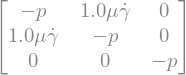

In [13]:
from sympy import *
from sympy.physics.mechanics import *
mechanics_printing(pretty_print=True)
p, mu, t = symbols('p, mu, t')
x1, x2, x3 = symbols('x1, x2, x3')


gamma = symbols('gamma', cls=Function)

F = Matrix([[1, gamma(t), 0],
            [0, 1, 0,],
            [0, 0, 1]])

B = F*F.T

T = eye(3)*-p+mu*mu*B


def deform():
    x = Matrix([[x2*diff(gamma(t), t), 0, 0]]).T
    
    return x

def deform_grad():
    p = Matrix([[x1, x2, x3]])
    x = deform()
    F = Matrix([[diff(x[0], p[0]), diff(x[0], p[1]), diff(x[0], p[2])],
                [diff(x[1], p[0]), diff(x[1], p[1]), diff(x[1], p[2])],
                [diff(x[2], p[0]), diff(x[2], p[1]), diff(x[2], p[2])]])
    return F

gradvs = deform_grad()
Ds = .5*(gradvs+gradvs.T)

nfT = -p*eye(3)+2*mu*Ds
nfT
